Here a DEEP dataset file names s01.mat is taken to conver into .csv file. In this segment, the purpose is to read the converted data.csv file. 
This file is generated for read a .csv file. this code is generated from ChatGPT and make changes according to my preferences.

In [2]:
import pandas as pd


In [4]:
file_path = "/Users/pabitra/Documents/data.csv" # Replace with your actual file path
df = pd.read_csv(file_path)


In [5]:
# Display the first 5 rows
df.head()

# Optional: check shape
df.shape  # (rows, columns)

# Optional: get summary
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Columns: 8064 entries, 0 to 8063
dtypes: float64(8064)
memory usage: 98.4 MB


In [6]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/Users/pabitra/Documents/data.csv')

# Preview the first few rows
print(df.head())

# See the dimensions
print("Shape:", df.shape)


          0         1         2         3         4         5         6  \
0  0.948232  1.653335  3.013726  1.495061 -1.264836 -1.969558 -2.169066   
1  0.124707  1.390083  1.835099 -1.110738 -2.590622 -1.844258 -0.739794   
2 -2.216511  2.292017  2.746369 -2.364459 -2.309528 -0.668117 -0.837056   
3  1.005734  1.297927  2.367689 -0.231850 -1.662444 -0.014568  0.736730   
4  5.095919  5.000869  4.176166  0.354056 -4.154098 -3.980890 -0.553856   

          7         8         9  ...      8054      8055      8056      8057  \
0 -0.215480  3.326769  0.847765  ...  0.226868 -0.872599 -0.251316  1.010068   
1  2.395738  3.976389  0.002038  ...  6.529591  4.566243  0.789426 -1.993420   
2  3.654975  6.369190  0.956049  ...  4.705621  3.893851  2.738965  0.631252   
3  1.421469  0.419904 -2.287016  ...  0.530650  2.947151  4.269418  3.324032   
4  1.402554 -0.276699 -3.664428  ...  0.817408  0.582459  2.267037  1.831632   

       8058      8059      8060      8061      8062      8063  
0  3

In [7]:
import os

folder = '/Users/pabitra/Documents'
csv_files = [f for f in os.listdir(folder) if f.endswith('.csv')]
print(csv_files)


['labels.csv', 'data.csv']


load the eeg deep dataset

In [8]:
import pandas as pd

# Load the EEG data from CSV
df = pd.read_csv('/Users/pabitra/Documents/data.csv')
print(df.shape)
df.head()


(1600, 8064)


,0,1,2,3,4,5,6,7,8,9,...,8054,8055,8056,8057,8058,8059,8060,8061,8062,8063
0,0.948232,1.653335,3.013726,1.495061,-1.264836,-1.969558,-2.169066,-0.215480,3.326769,0.847765,...,0.226868,-0.872599,-0.251316,1.010068,3.845171,5.582611,2.171023,-2.826489,-4.477230,-3.676928
1,0.124707,1.390083,1.835099,-1.110738,-2.590622,-1.844258,-0.739794,2.395738,3.976389,0.002038,...,6.529591,4.566243,0.789426,-1.993420,0.317051,5.416049,4.085006,-2.987021,-6.287809,-4.474290
2,-2.216511,2.292017,2.746369,-2.364459,-2.309528,-0.668117,-0.837056,3.654975,6.369190,0.956049,...,4.705621,3.893851,2.738965,0.631252,2.163665,6.221588,4.290778,-2.637078,-7.406510,-6.755904
3,1.005734,1.297927,2.367689,-0.231850,-1.662444,-0.014568,0.736730,1.421469,0.419904,-2.287016,...,0.530650,2.947151,4.269418,3.324032,4.516819,4.856169,-0.038786,-4.582649,-4.403024,-1.373118
4,5.095919,5.000869,4.176166,0.354056,-4.154098,-3.980890,-0.553856,1.402554,-0.276699,-3.664428,...,0.817408,0.582459,2.267037,1.831632,0.616502,0.298991,-0.268494,-0.879462,-2.608805,-2.170391


In [9]:
trial1 = df.iloc[:40]


In [10]:
channel5_trial1 = df.iloc[4]


Plot a sigle Channel Signal

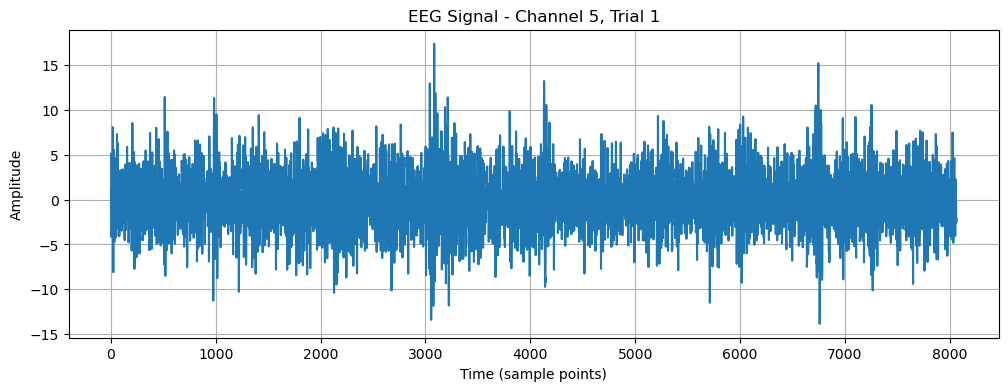

In [11]:
import matplotlib.pyplot as plt

# Assume 8064 time samples
plt.figure(figsize=(12, 4))
plt.plot(channel5_trial1.values)
plt.title("EEG Signal - Channel 5, Trial 1")
plt.xlabel("Time (sample points)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


plot multiple EEG channels from a trial

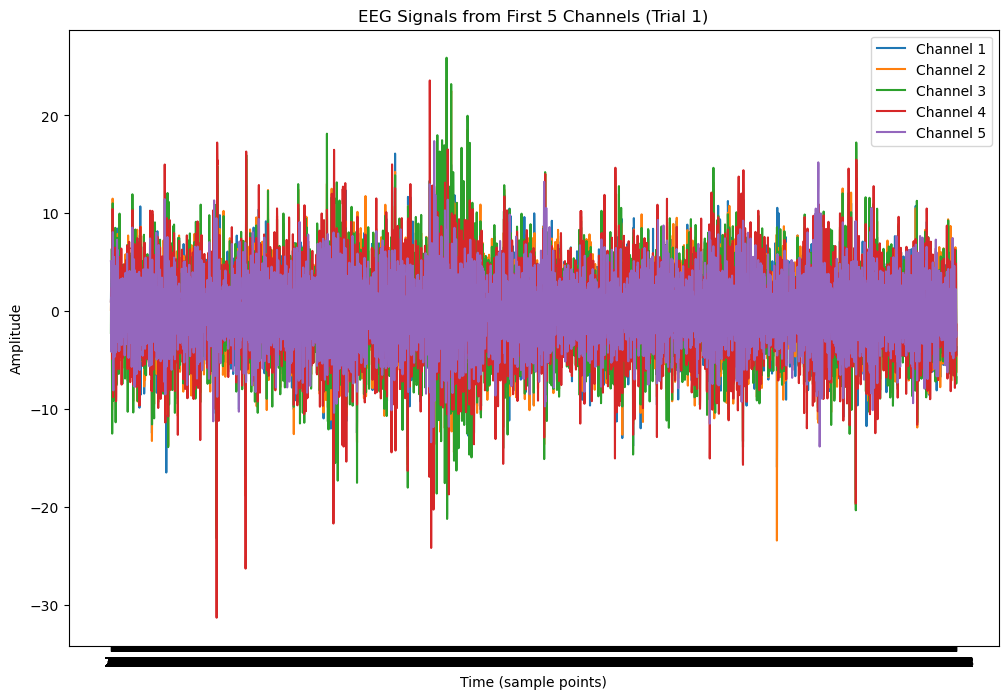

In [12]:
plt.figure(figsize=(12, 8))
for i in range(5):  # Plot 5 channels
    plt.plot(df.iloc[i], label=f'Channel {i+1}')
plt.legend()
plt.title("EEG Signals from First 5 Channels (Trial 1)")
plt.xlabel("Time (sample points)")
plt.ylabel("Amplitude")
plt.show()


Optional Filtering

Bandpass Filter

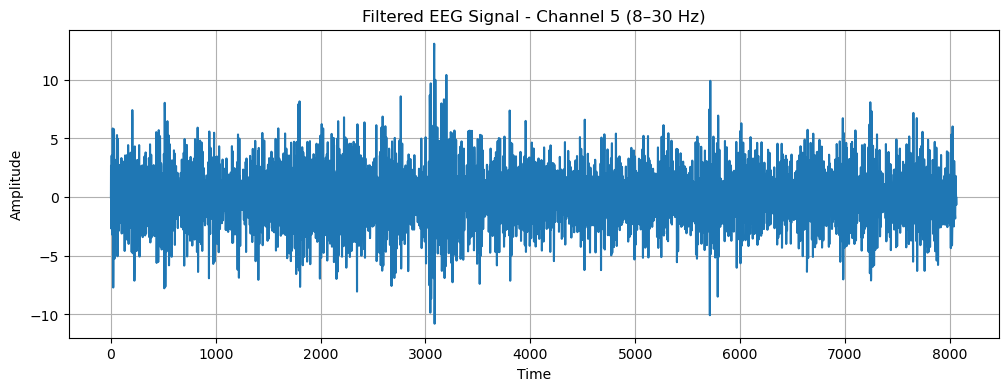

In [13]:
from scipy.signal import butter, filtfilt

# Bandpass filter: 8–30 Hz
def bandpass_filter(data, lowcut=8.0, highcut=30.0, fs=128, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Apply to one channel
filtered_signal = bandpass_filter(channel5_trial1.values, fs=128)

# Plot
plt.figure(figsize=(12, 4))
plt.plot(filtered_signal)
plt.title("Filtered EEG Signal - Channel 5 (8–30 Hz)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
